# Sistemas Inteligentes

## Exercício Computacional 1 - Classificação

Neste laboratório serão explorados os classificadores **KNN** e **Decision Tree**. Também vamos explorar a métrica de **Acurácia** e conhecer a **Confusion Matrix**.

### Identificação do Aluno

#### Nome Completo

Italo Milhomem de Abreu Lanza

#### RA

11039414

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **digits_dataset**.

In [1]:
from sklearn import datasets
digits_dataset = datasets.load_digits()

Tendo feito o processo adequadamente, a variável **digits_dataset** conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável **digits_img** apenas o objeto **images** de **digits_dataset**.

In [2]:
digits_img = digits_dataset.images

Verifique o formato de **digits_img**.

In [3]:
type(digits_img)


numpy.ndarray

In [4]:
digits_img.shape

(1797, 8, 8)

In [5]:
#digits_img.size
digits_img.size

115008

Imprima **digits_img** para que seja possível ver como são os dados que temos no momento.

In [6]:
digits_img

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

Sabendo que esta estrutura se refere a um conjunto de imagens, pode ser interessante imprimir ao menos uma ou duas para visualizarmos como é o seu padrão.

Para fazer isso, importe o pacote de funções **pyplot** da biblioteca **matplotlib**. Apesar de não ser obrigatório, para facilitar, recomenda-se utilizar um "apelido" para esse tipo de pacote com nome tão grande, a fim de tornar o seu uso mais prático. É comum utilizar o termo "plt" para o pyplot, mas você pode chamar como preferir.

In [7]:
from matplotlib import pyplot as plt

Depois de importar o pacote, utilize a função **imshow()** do **pyplot** para imprimir na tela uma das imagens contidas em **digits_img**.

Obs: caso tenha sido utilizado um apelido na importação do pacote, lembre-se dele quando for chamar suas funções, como é o caso agora.

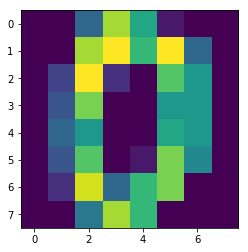

In [8]:
plt.imshow(digits_img[0])

Apesar de esse tipo de formato permitir que essas imagens sejam elegantemente exibidas a nós, humanos, não se trata de um formato tão interessante para se efetuar processamentos computacionais. Por isso, faça uma mudança no formato da estrutura utilizando a função **reshape()** da biblioteca **numpy**. Como tal biblioteca ainda não for importada, comece por sua importação, preferencialmente utilizando o apelido "np" para tornar mais prática a sua utilização.

In [9]:
import numpy as np

Agora, com a biblioteca já importada, utilize a função **reshape()** para forçar um formato unidimensional para cada imagem dentro da matriz original.

Note que o número de imagens não pode ser alterado, tampouco as imagens em si; apenas o formato da representação de cada uma dessas imagens pode sofrer alteração.

In [10]:
digits_reshaped = np.reshape(digits_img, (1797, 64))

Agora verifique se o novo formato está como desejava-se obter. Se o novo formato for bidimensional, o número de imagens for o mesmo que o original e o número de pixels for o mesmo que o original, então está correto.

In [11]:
digits_reshaped.shape
#digits_reshaped.size

(1797, 64)

Agora que já temos os dados de entrada adequadamente preparados, precisamos dos dados de saída correspondentes. Então, atribua o objeto **target** de **digits_dataset** à variável **digits_target**.

In [12]:
digits_target = digits_dataset.target

Imprima **digits_target** para visualizar como são esses dados

In [13]:
digits_target

array([0, 1, 2, ..., 8, 9, 8])

Agora imprima o formato de **digits_target** para saber exatamente as suas dimensões.

In [14]:
digits_target.shape

(1797,)

#### Divisão dos dados em grupos para treinamento e teste.

Importe a função **train_test_split()** do pacote **model_selection**, pertencente à biblioteca **sklearn**.

In [15]:
from sklearn import model_selection as ms

Agora, utilizando a função **train_test_split()**, divida os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **x_train**, **x_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split()**.

In [16]:
x_train, x_test, y_train, y_test = ms.train_test_split(digits_reshaped, digits_target, test_size=0.25)

Imprima, em diferentes células, o formato de cada uma das partes obtidas.

In [17]:
x_train.shape

(1347, 64)

In [18]:
y_train.shape

(1347,)

In [19]:
x_test.shape

(450, 64)

In [20]:
y_test.shape

(450,)

### K-Nearest Neighbors (KNN)

#### Treinamento

Importe o classificador do KNN, que é uma função chamada **KNeighborsClassifier** do pacote **neighbors**, que faz parte da biblioteca **sklearn**.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

Agora crie o classificador com o nome **knn** utilizando para o argumento *n_neighbors* da função **KNeighborsClassifier** o número de vizinhos próximos que serão considerados pelo algoritmo. Lembre-se de preferir um número ímpar não muito grande.

In [22]:
knn = KNeighborsClassifier(n_neighbors=7)

Treine o classificador **knn** por meio de sua própria função **fit()**, atribuindo o resultado ao próprio **knn**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **x_train** e **y_train**.

In [23]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

#### Classificação

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **knn**. O argumento da função é apenas a entrada de teste, ou seja, **x_test**. Atribua a saída dessa classificação à variável **y_pred**.

In [24]:
y_pred = knn.predict(x_test)

#### Resultados

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**.

In [25]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Comece utilizando a função **accuracy_score** para calcular a acurácia do classificador. Esta é uma das mais comuns métricas para se verificar o desempenho do classificador. O primeiro argumento da função é o conjunto de saídas esperadas, ou seja, **y_test**; o segundo, o conjunto de saídas obtidas pela predição do classificador utilizado, ou seja, **y_pred**.

In [26]:
acc = accuracy_score(y_test, y_pred)
acc

0.9933333333333333

Gere a matriz de confusão utilizando a função **confusion_matrix**.

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 46,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 39]])

### Decision Tree

#### Treinamento

In [28]:
from sklearn import tree

Assim como foi feito com o KNN, crie um classificador de Decision Tree chamado **dt** utilizando agora a função **DecisionTreeClassifier**.

In [29]:
dt = tree.DecisionTreeClassifier()

Treine classificador **dt** utilizando a função **fit** com os dados de treinamento, **x_train** e **y_train**, respectivamente.

In [30]:
dt = dt.fit(x_train, y_train)

#### Classificação

Faça a classificação dos dados de entrada para testes, **x_test**, utilizando a função **predict** do próprio **dt** e armazene os resultados em **y_pred**.

In [31]:
y_pred = dt.predict(x_test)

#### Resultados

Verifique a acurácia do classificador **dt** por meio da função **accuracy_score**.

In [32]:
acc_dt = accuracy_score(y_test, y_pred)
acc_dt

0.8622222222222222

Mostre a matriz de confusão do classificador **dt** utilizando a função **confusion_matrix**.

In [33]:
conf_matrix_dt = confusion_matrix(y_test, y_pred)
conf_matrix_dt

array([[38,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  1,  2,  0,  0,  0,  0,  2],
       [ 0,  1, 44,  1,  0,  0,  0,  1,  2,  3],
       [ 0,  3,  1, 48,  1,  0,  0,  0,  1,  0],
       [ 1,  1,  0,  0, 34,  1,  1,  3,  1,  2],
       [ 0,  0,  1,  3,  1, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  1,  0,  0],
       [ 0,  0,  1,  0,  3,  0,  0, 39,  1,  0],
       [ 2,  5,  4,  1,  0,  0,  0,  0, 36,  0],
       [ 1,  0,  0,  4,  0,  0,  0,  2,  2, 30]])

## Questões

### 1. O que você entende por "acurácia"? Esta métrica é suficiente para avaliar o desempenho de um classificador? Se não, o que mais poderia ser utilizado? E por que?

A acurácia é quantidade de acertos total dado uma quantidade de testes. Ela não é suficiente pois ela é uma métrica genérica que avalia o desempenho geral do classificador, não fornecendo informação a respeito do desempenho do classificador de maneira mais detalhada, como por exemplo diferenciar os acertos de verdadeiro positivo ou verdadeiro negativo.

Existem diversas métricas que que podem ser utilizadas para avaliar um classificador, tais como _sensibilidade_ (taxa de verdadeiro positivo), _especificidade_ (taxa de verdadeiro negativo), _precisão_ (taxa de positivos) etc. A escolha de cada uma dessas métricas vai depender da aplicação, de modo em que para algumas aplicações a sensibilidade, por exemplo, é uma métrica importante enquanto para outras a precisão pode ser a mais importante.

### 2. Que tipo de informação a matriz de confusão oferece sobre o classificador?

A matriz de confusão nos traz informações de performace do classificador. Ela compara os resultados estimados pelo classificador com um modelo de referência ("valor real").

### 3. O que representa cada linha dessa matriz? E cada coluna? E a diagonal principal?

As linhas da matriz representam os valores de classificação "reais", isto é, são os valores de classificação utilizados como referência. As colunas representam os valores identificados pelo classificador, isto é, como o classificador cada dado de entrada. A diagonal principal da matriz nos mostra a quantidade de classificações corretas do classificador.

### 4. Seria possível avaliar, ainda que superficialmente, o desempenho de um classificador se utilizássemos apenas pixels em escala de cinza para representar os valores de uma matriz de confusão? Por que?

Sim, pois à partir da matrix de confusão é possível ter uma ideia geral de como o classificador esta se comportando, tais como quais as categarias que ele consegue classificar de maneira correta, quais ele mais classifica de maneira incorreta e o desempenho geral.

Confusion matrix in grey scale


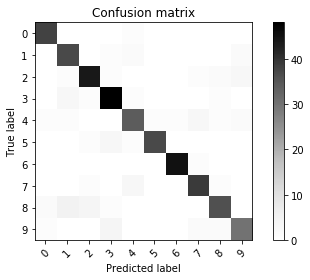

In [34]:
#Faz o desenho da matrix de confusao
#referencia: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py


import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix in grey scale')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, ''  ,horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()




plt.figure()
plot_confusion_matrix(conf_matrix_dt, classes= digits_dataset.target_names , title='Confusion matrix');
plt.show()

### 5. Quais critérios você utilizaria para escolher o número de vizinhos do algoritmo KNN? Por que? E como isso pode influenciar no desempenho do algoritmo?

Para _datasets_ em que os dados formem naturamente grupos escolheria valores baixos, pois desse modo a chance do dado estar próximo da categoria que ele pertence é maior. Já para qualquer outro tipo tentaria fazer uma avaliação empírica de qual o melhor número k. 

A escolha do valor de k é de grande importância, pois para valores muito baixos o seu resultado pode ser afetado por ruídos e para valores muito grandes você aumenta os erros de classificação.

### 6. Algum dos dois classificadores explorados neste laboratório é não paramétrico? Se sim, o que o permite fazer tal afirmação?

Não, pois nenhum dos classificadores utilizados foi utilizado qualquer tipo de parâmetro específico do _dataset_, de modo que não é feito nenhum tipo de pressuposto dos dados que serão testados.

### 7. Qual dos dois classificadores se saiu melhor neste laboratório? Por que? Caso fossem utilizados estes mesmos classificadores para classificar digitos de outra base de dados, o classificador com melhor desempenho ainda seria necessariamente o mesmo? Por que?

Considerando tanto a acurácia quanto a matriz de confusão temos que o classificador KNN se saiu melhor, já que apresenta uma maior acurácia e analisando a matriz de confusão vemos que o mesmo apresentou menos erros de classificação (apresenta menos valores fora da diagonal principal) quando camparado com o classificador _Decision Tree_.

Não, pois diferentes base de dados possuem diferentes características que podem reforçar ou não diferentes classificadores, de modo que não garantias de que o mesmo classificador terá o melhor desempenho para um outro banco de dados.

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)